<a href="https://colab.research.google.com/github/IA2021UR/trabajo-ia-en-la-comunidad-de-la-rioja-equipo-3/blob/main/Uru%C3%B1uela_1956_Revisado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

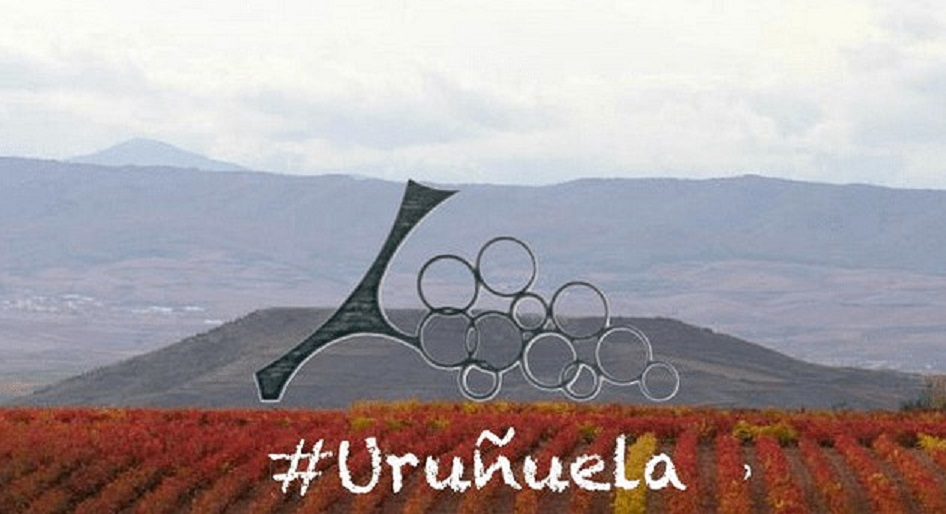

In [ ]:
import sys
import numpy as np
import cv2
import imutils
import argparse
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
%matplotlib inline

In [ ]:
!wget https://www.dropbox.com/s/3u5vz1hn9yu5w6r/Urunuela1956.zip?dl=1 -O urunuela.zip

--2021-05-20 14:54:57--  https://www.dropbox.com/s/3u5vz1hn9yu5w6r/Urunuela1956.zip?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.18, 2620:100:6030:18::a27d:5012
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/3u5vz1hn9yu5w6r/Urunuela1956.zip [following]
--2021-05-20 14:54:57--  https://www.dropbox.com/s/dl/3u5vz1hn9yu5w6r/Urunuela1956.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc92c6747e8f3694db5b70987037.dl.dropboxusercontent.com/cd/0/get/BO0RjF_x3T8Q9QScCKcLbrZldkVQFG8H5ls6bjxj8_f4k0rzeS4vMsZhKIw2w7LD6oHo5snkkDq50FTTkXkyHWoiST5qMkhq_6RlrHcih7G_4s0aDFkPnzQreeYUvib7orDcwad7LoyQGTtQSjkr28lf/file?dl=1# [following]
--2021-05-20 14:54:58--  https://uc92c6747e8f3694db5b70987037.dl.dropboxusercontent.com/cd/0/get/BO0RjF_x3T8Q9QScCKcLbrZldkVQFG8H5ls6bjxj8_f4k0rzeS4vMsZhKIw2w7LD6oHo5snkk

In [ ]:
!unzip urunuela.zip

Archive:  urunuela.zip
  inflating: Urunuela1956/Urunuela-1bis.jpg  
  inflating: Urunuela1956/Urunuela-2bis.jpg  


In [ ]:
def mostrarImagen(image):
    if len(image.shape)==3:
        img2 = image[:,:,::-1]
        plt.imshow(img2)
        plt.show()
    else:
        img2 = image
        plt.imshow(img2,cmap='gray')
        plt.show()

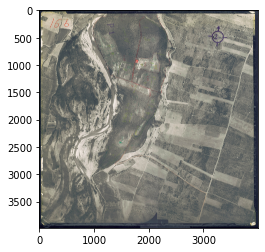

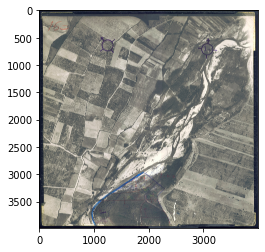

In [ ]:
import os
urunuela = {}
for image in os.listdir("Urunuela1956"):
    imagen = cv2.imread("Urunuela1956/" + image)
    numero = int(image[-8:-7])
    urunuela[numero] = imagen
    mostrarImagen(imagen)

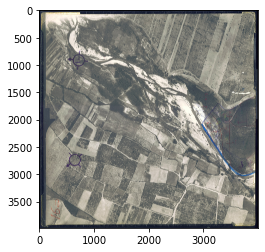

In [ ]:
rotadas  = []
(h, w)   = urunuela[1].shape[:2]
(cx, cy) = (w/2, h/2)
M3 = cv2.getRotationMatrix2D((cx, cy), 90, 1.0)
rotada1  = cv2.warpAffine(urunuela[1], M3, (w, h))
rotadas.append(rotada1)
mostrarImagen(rotada1)

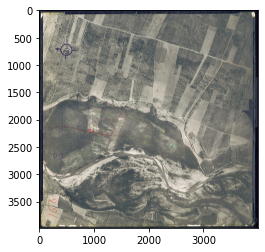

In [ ]:
(h, w)   = urunuela[2].shape[:2]
(cx, cy) = (w/2, h/2)
M3 = cv2.getRotationMatrix2D((cx, cy), 90, 1.0)
rotada2  = cv2.warpAffine(urunuela[2], M3, (w, h))
rotadas.append(rotada2)
mostrarImagen(rotada2)

In [ ]:
img1_gray = cv2.cvtColor(rotada1, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(rotada2, cv2.COLOR_BGR2GRAY)

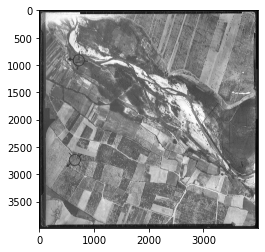

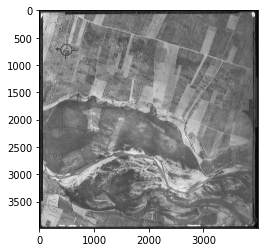

In [ ]:
mostrarImagen(img1_gray)
mostrarImagen(img2_gray)

In [ ]:
# Create our ORB detector and detect keypoints and descriptors
orb = cv2.ORB_create(nfeatures=2000)

# Find the key points and descriptors with ORB
keypoints1, descriptors1 = orb.detectAndCompute(rotada1, None)
keypoints2, descriptors2 = orb.detectAndCompute(rotada2, None)

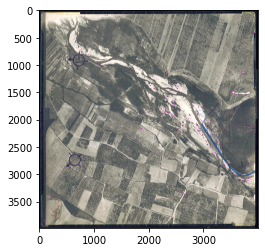

In [ ]:
img1KeyPoints=cv2.drawKeypoints(rotada1, keypoints1, None, (255, 0, 255))
mostrarImagen(img1KeyPoints)

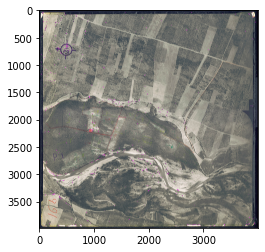

In [ ]:
img2KeyPoints = cv2.drawKeypoints(rotada2, keypoints2, None, (255, 0, 255))
mostrarImagen(img2KeyPoints)

In [ ]:
# Create a BFMatcher object.
# It will find all of the matching keypoints on two images
bf = cv2.BFMatcher_create(cv2.NORM_HAMMING)

# Find matching points
matches = bf.knnMatch(descriptors1, descriptors2,k=2)

In [ ]:
print(keypoints1[0].pt)

(315.0, 361.0)


In [ ]:
print(keypoints1[0].size)

31.0


In [ ]:
print("Descriptor of the first keypoint: ")
print(descriptors1[0])

Descriptor of the first keypoint: 
[171 255  36  29 217 157 180 231 251 123 164  93 170 172  22 181 141  43
 250   5 247 110 246 255  46  94  84 122  75  84 203 221]


In [ ]:
def draw_matches(rotada1, keypoints1, rotada2, keypoints2, matches):
  r, c = rotada1.shape[:2]
  r1, c1 = rotada2.shape[:2]

  # Create a blank image with the size of the first image + second image
  output_img = np.zeros((max([r, r1]), c+c1, 3), dtype='uint8')
  output_img[:r, :c, :] = np.dstack([rotada1, rotada1, rotada1])
  output_img[:r1, c:c+c1, :] = np.dstack([rotada2, rotada2, rotada2])

  # Go over all of the matching points and extract them
  for match in matches:
    img1_idx = match.queryIdx
    img2_idx = match.trainIdx
    (x1, y1) = keypoints1[img1_idx].pt
    (x2, y2) = keypoints2[img2_idx].pt

    # Draw circles on the keypoints
    cv2.circle(output_img, (int(x1),int(y1)), 4, (0, 255, 255), 1)
    cv2.circle(output_img, (int(x2)+c,int(y2)), 4, (0, 255, 255), 1)

    # Connect the same keypoints
    cv2.line(output_img, (int(x1),int(y1)), (int(x2)+c,int(y2)), (0, 255, 255), 1)
    
  return output_img

In [ ]:
all_matches = []
for m, n in matches:
  all_matches.append(m)

img3 = draw_matches(img1_gray, keypoints1, img2_gray, keypoints2, all_matches[:30])
cv2_imshow(img3)

In [ ]:
# Finding the best matches
good = []
for m, n in matches:
    if m.distance < 0.6 * n.distance:
        good.append(m)

In [ ]:
mostrarImagen(cv2.drawKeypoints(rotada1, [keypoints1[m.queryIdx] for m in good], None, (255, 0, 255)))

In [ ]:
mostrarImagen(cv2.drawKeypoints(rotada2, [keypoints2[m.trainIdx] for m in good], None, (255, 0, 255)))

In [ ]:
def warpImages(img1, img2, H):

  rows1, cols1 = img1.shape[:2]
  rows2, cols2 = img2.shape[:2]

  list_of_points_1 = np.float32([[0,0], [0, rows1],[cols1, rows1], [cols1, 0]]).reshape(-1, 1, 2)
  temp_points = np.float32([[0,0], [0,rows2], [cols2,rows2], [cols2,0]]).reshape(-1,1,2)

  # When we have established a homography we need to warp perspective
  # Change field of view
  list_of_points_2 = cv2.perspectiveTransform(temp_points, H)

  list_of_points = np.concatenate((list_of_points_1,list_of_points_2), axis=0)

  [x_min, y_min] = np.int32(list_of_points.min(axis=0).ravel() - 0.5)
  [x_max, y_max] = np.int32(list_of_points.max(axis=0).ravel() + 0.5)
  
  translation_dist = [-x_min,-y_min]
  
  H_translation = np.array([[1, 0, translation_dist[0]], [0, 1, translation_dist[1]], [0, 0, 1]])

  output_img = cv2.warpPerspective(img2, H_translation.dot(H), (x_max-x_min, y_max-y_min))
  output_img[translation_dist[1]:rows1+translation_dist[1], translation_dist[0]:cols1+translation_dist[0]] = img1

  return output_img

In [ ]:
# Set minimum match condition
MIN_MATCH_COUNT = 10

if len(good) > MIN_MATCH_COUNT:
    # Convert keypoints to an argument for findHomography
    src_pts = np.float32([ keypoints1[m.queryIdx].pt for m in good]).reshape(-1,1,2)
    dst_pts = np.float32([ keypoints2[m.trainIdx].pt for m in good]).reshape(-1,1,2)

    # Establish a homography
    M, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
    
    result = warpImages(rotada2, rotada1, M)

    cv2_imshow(result)

NO LLEGA AL MINIMO

In [ ]:
!wget https://www.dropbox.com/s/0oibe9gy90sz08p/Prueba.zip?dl=0 -O prueba.zip

In [ ]:
!unzip prueba.zip

In [ ]:
img1=cv2.imread("Prueba/Prueba1.jpg")
img2=cv2.imread("Prueba/Prueba2.jpg")

In [ ]:
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

In [ ]:
mostrarImagen(img1_gray)
mostrarImagen(img2_gray)

In [ ]:
# Create our ORB detector and detect keypoints and descriptors
orb = cv2.ORB_create(nfeatures=2000)

# Find the key points and descriptors with ORB
keypoints1, descriptors1 = orb.detectAndCompute(img1, None)
keypoints2, descriptors2 = orb.detectAndCompute(img2, None)

In [ ]:
img1KeyPoints=cv2.drawKeypoints(img1, keypoints1, None, (255, 0, 255))
mostrarImagen(img1KeyPoints)

In [ ]:
img2KeyPoints=cv2.drawKeypoints(img2, keypoints2, None, (255, 0, 255))
mostrarImagen(img2KeyPoints)

In [ ]:
# Create a BFMatcher object.
# It will find all of the matching keypoints on two images
bf = cv2.BFMatcher_create(cv2.NORM_HAMMING)

# Find matching points
matches = bf.knnMatch(descriptors1, descriptors2,k=2)

In [ ]:
all_matches = []
for m, n in matches:
  all_matches.append(m)

img3 = draw_matches(img1_gray, keypoints1, img2_gray, keypoints2, all_matches[:30])
cv2_imshow(img3)

In [ ]:
# Finding the best matches
good = []
for m, n in matches:
    if m.distance < 0.6 * n.distance:
        good.append(m)

In [ ]:
mostrarImagen(cv2.drawKeypoints(img1, [keypoints1[m.queryIdx] for m in good], None, (255, 0, 255)))

In [ ]:
mostrarImagen(cv2.drawKeypoints(img2, [keypoints2[m.trainIdx] for m in good], None, (255, 0, 255)))

In [ ]:
MIN_MATCH_COUNT = 10

if len(good) > MIN_MATCH_COUNT:
    # Convert keypoints to an argument for findHomography
    src_pts = np.float32([ keypoints1[m.queryIdx].pt for m in good]).reshape(-1,1,2)
    dst_pts = np.float32([ keypoints2[m.trainIdx].pt for m in good]).reshape(-1,1,2)

    # Establish a homography
    M, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
    
    result = warpImages(img2, img1, M)

    cv2_imshow(result)